In [1]:
from Statistics_functions import answers
from Statistics_functions import sum_pts
from Statistics_functions import continuity
import sqlite3

In [2]:
conn = sqlite3.connect('F1-2023.db')

## Bahrain Grand Prix

In [3]:
answers(1, conn)

,Wonde,Tome,Hrici,Kajlo,Sasu,OG
Víťaz veľkej ceny (1. miesto),VER,VER,VER,VER,VER,
Runner up veľkej ceny (2. miesto),PER,PER,PER,LEC,PER,
Kto skončí na treťom mieste?,LEC,LEC,ALO,SAI,ALO,
Najrýchlejšie kolo,VER,HAM,VER,VER,VER,
Posledné miesto zo všetkých ktorí dokončili veľkú cenu,PIA,ALB,DEV,SAR,SAR,
jazdec ktorí skončí ako DNF,ALB,MAG,STR,ALB,TSU,
V závode bude červená vlajka,Nie,Nie,Nie,Nie,Nie,
V závode bude safety car,Ano,Nie,Ano,Ano,Ano,
V zavode bude VSC?,Ano,Ano,Ano,Ano,Ano,
V závode bude havária 2 a viacerých jazdcov,Nie,Nie,Nie,Nie,Nie,


## Saudi Arabian Grand Prix

In [4]:
answers(2, conn)

,Wonde,Tome,Hrici,Kajlo,Sasu,OG
Víťaz veľkej ceny (1. miesto),PER,PER,PER,ALO,PER,PER
Runner up veľkej ceny (2. miesto),ALO,ALO,ALO,PER,LEC,ALO
Kto skončí na treťom mieste?,VER,SAI,VER,VER,ALO,VER
Najrýchlejšie kolo,VER,VER,VER,VER,VER,PER
Posledné miesto zo všetkých ktorí dokončili veľkú cenu,DEV,DEV,SAR,DEV,SAR,SAR
jazdec ktorí skončí ako DNF,SER,SER,NOR,SAR,TSU,STR
V závode bude červená vlajka,Ano,Ano,Ano,Ano,Nie,Nie
V závode bude safety car,Ano,Ano,Ano,Ano,Ano,Ano
V zavode bude VSC?,Nie,Ano,Ano,Ano,Ano,Ano
V závode bude havária 2 a viacerých jazdcov,Nie,Ano,Nie,Nie,Nie,Nie


## Celkove hodnotenie

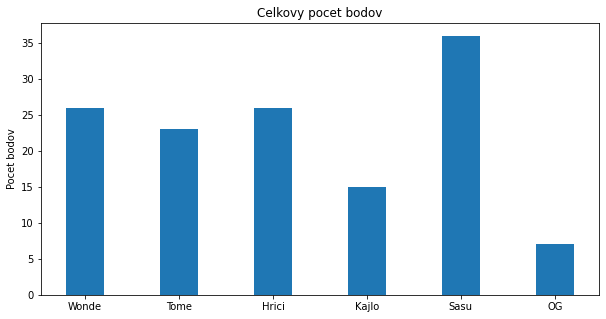

{'Wonde': 26, 'Tome': 23, 'Hrici': 26, 'Kajlo': 15, 'Sasu': 36, 'OG': 7}


In [7]:
sum_pts(2, conn)

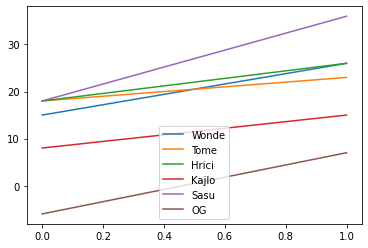

{'Wonde': [15, 26], 'Tome': [18, 23], 'Hrici': [18, 26], 'Kajlo': [8, 15], 'Sasu': [18, 36], 'OG': [-6, 7]}


In [6]:
continuity(2, conn)

In [8]:
conn.close()